### Adapted from Coursera Deep Learning Speciality: Improving Deep Neural Networks: Hyperparameter tuning, regularization, optimization

#### Regularization

#### offered by deeplearning.ai

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from deepnn import io
from deepnn import models
from deepnn import predict

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

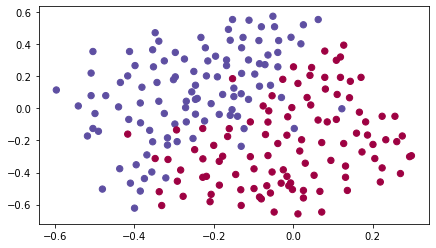

In [4]:
train_X, train_Y, test_X, test_Y = io.load_2D_dataset()

In [19]:
L_dims = [train_X.shape[0], 20, 3, 1]

Cost after iteration 0: 0.729777
Cost after iteration 1000: 0.224777
Cost after iteration 2000: 0.232349
Cost after iteration 3000: 0.203979
Cost after iteration 4000: 0.209014
Cost after iteration 5000: 0.193979
Cost after iteration 6000: 0.191910
Cost after iteration 7000: 0.195003
Cost after iteration 8000: 0.206812
Cost after iteration 9000: 0.199110
Cost after iteration 10000: 0.187398
Cost after iteration 11000: 0.186183
Cost after iteration 12000: 0.193391
Cost after iteration 13000: 0.180678
Cost after iteration 14000: 0.197251
Cost after iteration 15000: 0.205064
Cost after iteration 16000: 0.195695
Cost after iteration 17000: 0.191691
Cost after iteration 18000: 0.187851
Cost after iteration 19000: 0.179653
Cost after iteration 20000: 0.183556
Cost after iteration 21000: 0.197006
Cost after iteration 22000: 0.186475
Cost after iteration 23000: 0.187578
Cost after iteration 24000: 0.184715


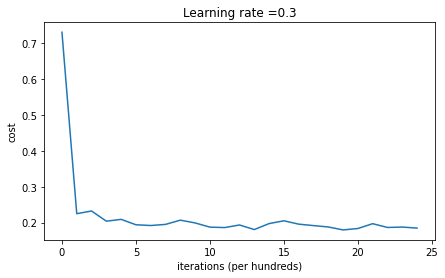

In [34]:
#initialization options: zeros, random, he, deep
init = "he"
parameters = models.L_layer_model(train_X, train_Y, L_dims, 
                                  learning_rate=0.3, num_iterations=25000, 
                                  print_cost=True, initialization = "deep", lambd = 0)

In [35]:
print ("On the training set:")
predictions_train = predict.predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict.predict(test_X, test_Y, parameters)

On the training set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.9249999999999998


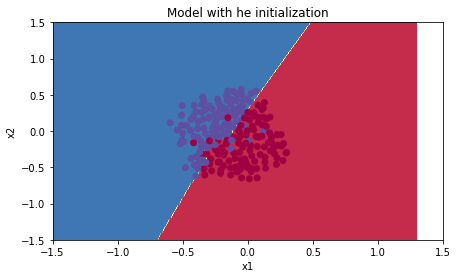

In [37]:
plt.title("Model with {init} initialization".format(init=init))
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
io.plot_decision_boundary(lambda x: predict.predict_dec(parameters, x.T), train_X, train_Y)

In [38]:
def backward_propagation_with_regularization_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(3, 5)
    Y_assess = np.array([[1, 1, 0, 1, 0]])
    cache = (np.array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],
         [-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]),
  np.array([[ 0.        ,  3.32524635,  2.13994541,  2.60700654,  0.        ],
         [ 0.        ,  4.1600994 ,  0.79051021,  1.46493512,  0.        ]]),
  np.array([[-1.09989127, -0.17242821, -0.87785842],
         [ 0.04221375,  0.58281521, -1.10061918]]),
  np.array([[ 1.14472371],
         [ 0.90159072]]),
  np.array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],
         [-0.69166075, -3.47645987, -2.25194702, -2.65416996, -0.69166075],
         [-0.39675353, -4.62285846, -2.61101729, -3.22874921, -0.39675353]]),
  np.array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
  np.array([[ 0.50249434,  0.90085595],
         [-0.68372786, -0.12289023],
         [-0.93576943, -0.26788808]]),
  np.array([[ 0.53035547],
         [-0.69166075],
         [-0.39675353]]),
  np.array([[-0.3771104 , -4.10060224, -1.60539468, -2.18416951, -0.3771104 ]]),
  np.array([[ 0.40682402,  0.01629284,  0.16722898,  0.10118111,  0.40682402]]),
  np.array([[-0.6871727 , -0.84520564, -0.67124613]]),
  np.array([[-0.0126646]]))
    return X_assess, Y_assess, cache

In [40]:
from deepnn.back_prop import L_model_backward

In [39]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

In [41]:
grads = L_model_backward(X_assess, Y_assess, cache, lambd = 0.7)

ValueError: cannot reshape array of size 5 into shape (3,5)

In [42]:
X_assess

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763],
       [-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944]])

In [43]:
Y_assess

array([[1, 1, 0, 1, 0]])

In [44]:
cache

(array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],
        [-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]),
 array([[0.        , 3.32524635, 2.13994541, 2.60700654, 0.        ],
        [0.        , 4.1600994 , 0.79051021, 1.46493512, 0.        ]]),
 array([[-1.09989127, -0.17242821, -0.87785842],
        [ 0.04221375,  0.58281521, -1.10061918]]),
 array([[1.14472371],
        [0.90159072]]),
 array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],
        [-0.69166075, -3.47645987, -2.25194702, -2.65416996, -0.69166075],
        [-0.39675353, -4.62285846, -2.61101729, -3.22874921, -0.39675353]]),
 array([[0.53035547, 5.94892323, 2.31780174, 3.16005701, 0.53035547],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 array([[ 0.50249434,  0.90085595],
        [-0.68372786, -0.12289023],
        [-0.93576943, -0.26788808]]),
 array([[ 0

In [45]:
X_assess

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763],
       [-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944]])